In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error

from src.utilities.utilities import load_data

import src.surrogates as surrogate

%matplotlib inline

In [2]:
X, y = load_data(model="kw_97_basic", n_train=7000)
X_test, y_test = load_data(model="kw_97_basic", testing=True)

In [3]:
lm = surrogate.fit("poly", X, y, degree=2)

predictions = surrogate.predict(X_test, lm)

In [4]:
results = y_test
results["pred"] = predictions
results = results.rename({"qoi2000": "true"}, axis=1)
results

,,true,pred
iteration,dataset,,
0,test,2.6243,2.616635
1,test,2.6239,2.618385
2,test,2.5317,2.540214
3,test,2.6141,2.617454
4,test,2.6097,2.614148
...,...,...,...
2995,test,2.6193,2.631994
2996,test,2.6566,2.663453
2997,test,2.6071,2.607921


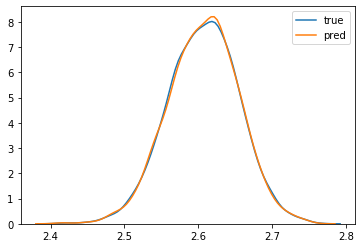

In [5]:
fig, ax = plt.subplots()
sns.kdeplot(results["true"], ax=ax)
sns.kdeplot(results["pred"], ax=ax)

In [6]:
mae = mean_absolute_error(results["pred"], results["true"])
mae

0.0060644437700283615